Name : Rajendra R. Prasad
Class : M.SC(IMCA)
Roll No. - 17222

In [119]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

Reading Data Files

In [66]:
train_df = pd.read_csv('C:/Users/rajendra/Desktop/DataMiningAssigment/Train (2).csv', index_col='session_id')
test_df = pd.read_csv('C:/Users/rajendra/Desktop/DataMiningAssigment/Test (2).csv',index_col='session_id')


In [67]:
train_df.columns

Index(['site1', 'time1', 'site2', 'time2', 'site3', 'time3', 'site4', 'time4',
       'site5', 'time5', 'site6', 'time6', 'site7', 'time7', 'site8', 'time8',
       'site9', 'time9', 'site10', 'time10', 'target'],
      dtype='object')

Select only site data

In [68]:
full_df = pd.concat([train_df.drop('target', axis=1), test_df])

In [69]:
times = ['time%s' % i for i in range(1, 11)]

In [70]:
full_df[times] = full_df[times].apply(pd.to_datetime)

In [71]:
train_df.columns

Index(['site1', 'time1', 'site2', 'time2', 'site3', 'time3', 'site4', 'time4',
       'site5', 'time5', 'site6', 'time6', 'site7', 'time7', 'site8', 'time8',
       'site9', 'time9', 'site10', 'time10', 'target'],
      dtype='object')

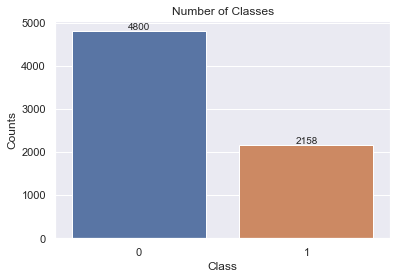

In [72]:
ax = sns.countplot(x='target', data=train_df)
ax.set(xlabel='Class', ylabel='Counts', title='Number of Classes')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{}'.format(p.get_height()), (x.mean(), y), ha='center', va='bottom')

Data is not balanced Hence Accuracy measure does not give the proper model Performance

In [73]:
Percen = train_df.target.value_counts()

In [74]:
class_1 = Percen[0]/(Percen[0]+Percen[1])*100
class_2 = Percen[1]/(Percen[0]+Percen[1])*100

In [75]:
print("% of class 0 : ",class_1)
print("% of class 1 : ",class_2)

% of class 0 :  68.98534061511928
% of class 1 :  31.014659384880712


In [76]:
target = train_df.target

In [80]:
train_df.columns

Index(['site1', 'time1', 'site2', 'time2', 'site3', 'time3', 'site4', 'time4',
       'site5', 'time5', 'site6', 'time6', 'site7', 'time7', 'site8', 'time8',
       'site9', 'time9', 'site10', 'time10', 'dow', 'day', 'week', 'month',
       'hour', 'year', 'session_time'],
      dtype='object')

In [81]:
full_df['dow'] = full_df['time1'].apply(lambda x: x.dayofweek)
full_df['day'] = full_df['time1'].apply(lambda x: x.day)
full_df['week'] = full_df['time1'].apply(lambda x: x.week)
full_df['month'] = full_df['time1'].apply(lambda x: x.month)
full_df['hour'] = full_df['time1'].apply(lambda x: x.hour)
full_df['year'] = full_df['time1'].apply(lambda x: x.year)
full_df['session_time'] = (full_df['time10'] - full_df['time1']).astype('timedelta64[s]').astype('int')
full_df['session_time'] = full_df['session_time'].apply(lambda x: 108000 if x<0 else x)

train_df = full_df.iloc[:idx_split, :]
train_df['target'] = target 
test_df = full_df.iloc[idx_split:, :]

C:\Users\rajendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


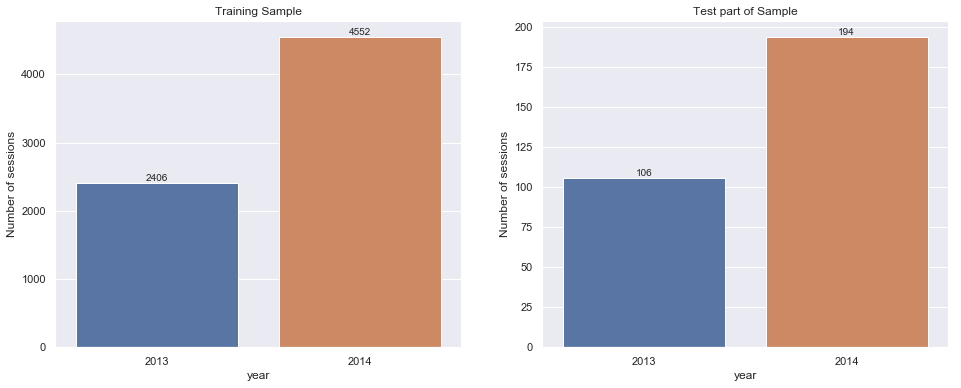

In [82]:
_, axes = plt.subplots(1, 2, figsize=(16,6))
sns.countplot(x='year', data=train_df, ax=axes[0])
sns.countplot(x='year', data=test_df, ax=axes[1])
axes[0].set(xlabel='year', ylabel='Number of sessions', title='Training Sample')
axes[1].set(xlabel='year', ylabel='Number of sessions', title='Test part of Sample')

for ax in axes:    
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{}'.format(p.get_height()), (x.mean(), y), ha='center', va='bottom')

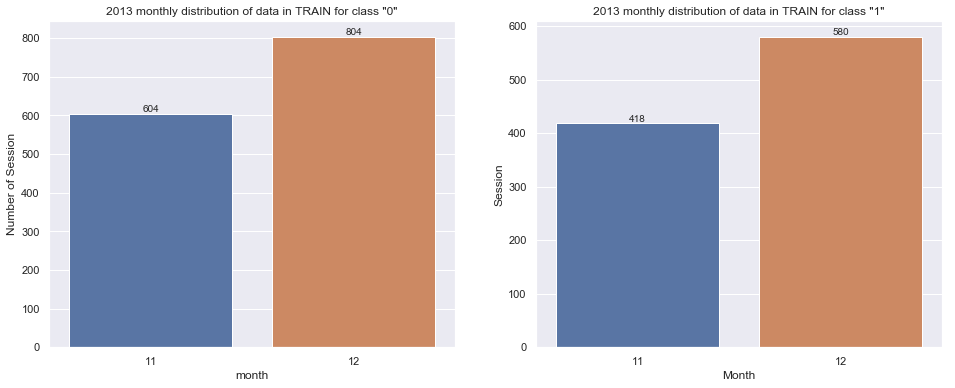

In [84]:
_, axes = plt.subplots(1, 2, figsize=(16,6))
tmp_df = train_df[(train_df.target==0)&(train_df.year==2013)]
sns.countplot('month', data=tmp_df, ax=axes[0])
tmp_df = train_df[(train_df.target==1)&(train_df.year==2013)]
sns.countplot('month', data=tmp_df, ax=axes[1])
axes[0].set(xlabel='month', ylabel='Number of Session', 
            title='2013 monthly distribution of data in TRAIN for class "0"')
axes[1].set(xlabel='Мonth', ylabel='Session', 
            title='2013 monthly distribution of data in TRAIN for class "1"')

for ax in axes:    
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{}'.format(p.get_height()), (x.mean(), y), ha='center', va='bottom')

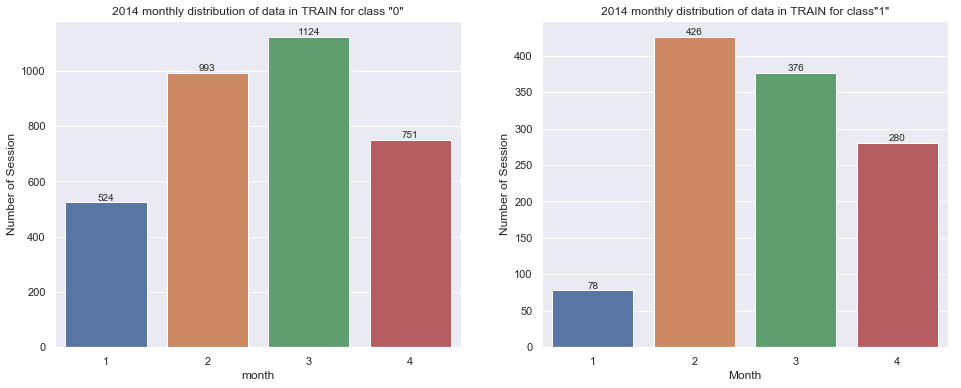

In [86]:
_, axes = plt.subplots(1, 2, figsize=(16,6))
tmp_df = train_df[(train_df.target==0)&(train_df.year==2014)]
sns.countplot('month', data=tmp_df, ax=axes[0])
tmp_df = train_df[(train_df.target==1)&(train_df.year==2014)]
sns.countplot('month', data=tmp_df, ax=axes[1])
axes[0].set(xlabel='month', ylabel='Number of Session', 
            title='2014 monthly distribution of data in TRAIN for class "0"')
axes[1].set(xlabel='Мonth', ylabel='Number of Session', 
            title='2014 monthly distribution of data in TRAIN for class"1"')

for ax in axes:    
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{}'.format(p.get_height()), (x.mean(), y), ha='center', va='bottom')

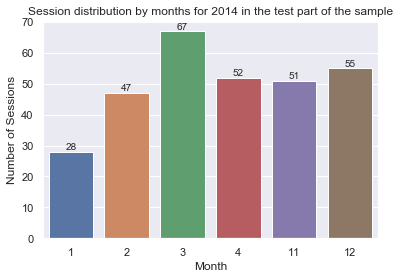

In [87]:
ax = sns.countplot('month', data=test_df)
ax.set(xlabel='Мonth', ylabel='Number of Sessions', 
       title='Session distribution by months for 2014 in the test part of the sample')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{}'.format(p.get_height()), (x.mean(), y), ha='center', va='bottom')

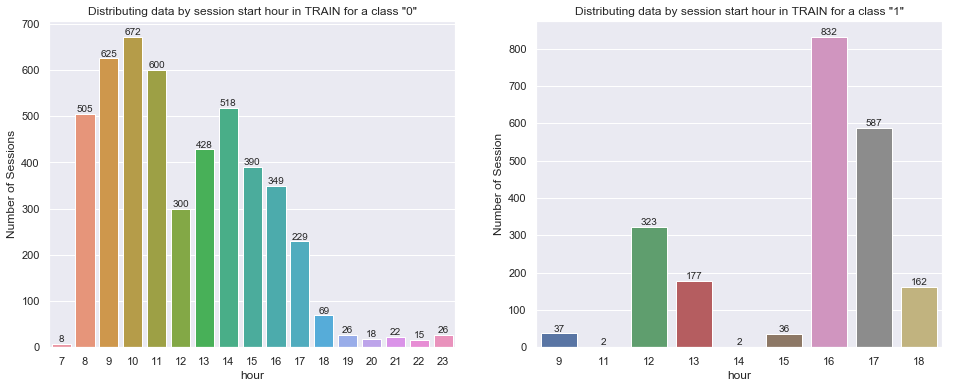

In [88]:
_, axes = plt.subplots(1, 2, figsize=(16,6))
tmp_df = train_df[train_df.target==0]
sns.countplot('hour', data=tmp_df, ax=axes[0])
tmp_df = train_df[train_df.target==1]
sns.countplot('hour', data=tmp_df, ax=axes[1])
axes[0].set(xlabel='hour', ylabel='Number of Sessions', title='Distributing data by session start hour in TRAIN for a class "0"')
axes[1].set(xlabel='hour', ylabel='Number of Session', title='Distributing data by session start hour in TRAIN for a class "1"');

for ax in axes:    
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{}'.format(p.get_height()), (x.mean(), y), ha='center', va='bottom')

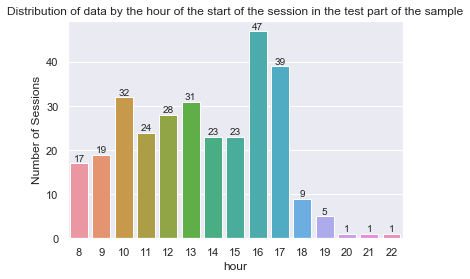

In [89]:
ax = sns.countplot('hour', data=test_df)
ax.set(xlabel='hour', ylabel='Number of Sessions', 
       title='Distribution of data by the hour of the start of the session in the test part of the sample')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{}'.format(p.get_height()), (x.mean(), y), ha='center', va='bottom')

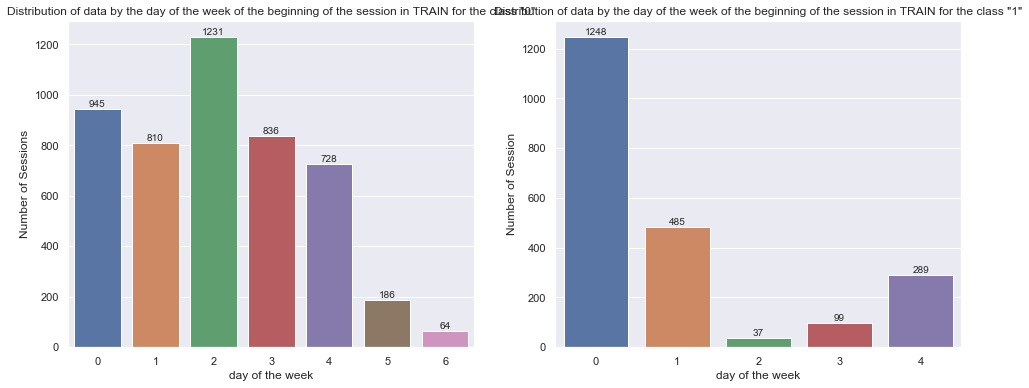

In [90]:
_, axes = plt.subplots(1, 2, figsize=(16,6))
tmp_df = train_df[train_df.target==0]
sns.countplot('dow', data=tmp_df, ax=axes[0])
tmp_df = train_df[train_df.target==1]
sns.countplot('dow', data=tmp_df, ax=axes[1])
axes[0].set(xlabel='day of the week', ylabel='Number of Sessions', 
            title='Distribution of data by the day of the week of the beginning of the session in TRAIN for the class "0"')
axes[1].set(xlabel='day of the week', ylabel='Number of Session', 
            title='Distribution of data by the day of the week of the beginning of the session in TRAIN for the class "1"');

for ax in axes:    
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{}'.format(p.get_height()), (x.mean(), y), ha='center', va='bottom')


In [5]:
full_df.shape

(7258, 20)

In [6]:
idx_split = train_df.shape[0]

In [7]:
sites = ['site%s' % i for i in range(1, 11)]

In [8]:
full_sites=full_df[sites]

In [9]:
sites_flatten = full_sites.values.flatten()

Creating Sparse Matrix for data contains only website ID

In [10]:
full_sites_sparse = csr_matrix(([1] * sites_flatten.shape[0], sites_flatten,range(0, sites_flatten.shape[0] + 10, 10)))[:, 1:]

In [11]:
full_sites_sparse.shape

(7258, 41560)

from sites Id's we have obtain 41560 feature now this features can be used for model building 
This sparse matrix can be reduced using PCA to obtain only data which have higher variance 
Since many features contain only 0 values it has no importance to build the model and it can be safely removed
But as data is to large I can not rduced using PCA as my machine is not able to handle such large computation.
But I have mention the way of reducing sparse matrix

In [94]:
Train_Data = full_sites_sparse[0:idx_split, :]
Test_Data = full_sites_sparse[idx_split:,:]
T=Train_Data

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(T,target,test_size=0.2,stratify=target,random_state=6)

=======================Logistic Regression============================

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [97]:
model_1 = LogisticRegression()

y_pred = model_1.fit(X_train, y_train)

test_pred = model_1.predict(X_test)
train_pred = model_1.predict(X_train)
print("----------------------Training Accuracy-------------------------------")

print(confusion_matrix(y_train, train_pred))
print(accuracy_score(y_train, train_pred))
print("----------------------Test Accuracy-----------------------------------")

print(confusion_matrix(y_test, test_pred))
print(accuracy_score(y_test, test_pred))


C:\Users\rajendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


----------------------Training Accuracy-------------------------------
[[3604  236]
 [ 134 1592]]
0.9335249730506647
----------------------Test Accuracy-----------------------------------
[[883  77]
 [ 82 350]]
0.8857758620689655


In [112]:
scores = cross_val_score(model_1, Train_Data, target, cv=5)
print(scores)

C:\Users\rajendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.84267241 0.78735632 0.81465517 0.82961898 0.82602444]


############################################################################################################################

=======================Random Forest============================

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
model_2=RandomForestClassifier(n_estimators=100)

y_pred = model_2.fit(X_train, y_train)

test_pred = model_2.predict(X_test)
train_pred = model_2.predict(X_train)
print("----------------------Training Accuracy-------------------------------")

print(confusion_matrix(y_train, train_pred))
print(accuracy_score(y_train, train_pred))
print("----------------------Test Accuracy-----------------------------------")

print(confusion_matrix(y_test, test_pred))
print(accuracy_score(y_test, test_pred))

----------------------Training Accuracy-------------------------------
[[3820   20]
 [  22 1704]]
0.9924541861300754
----------------------Test Accuracy-----------------------------------
[[903  57]
 [103 329]]
0.8850574712643678


In [111]:
scores = cross_val_score(model_2, Train_Data, target, cv=5)
print(scores)

[0.85775862 0.76867816 0.82183908 0.83321352 0.82530554]


In [ ]:
=======================KNN============================

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
model_3 = KNeighborsClassifier(n_neighbors=5)
y_pred = model_3.fit(X_train, y_train)

test_pred = model_3.predict(X_test)
train_pred = model_3.predict(X_train)
print("----------------------Training Accuracy-------------------------------")

print(confusion_matrix(y_train, train_pred))
print(accuracy_score(y_train, train_pred))
print("----------------------Test Accuracy-----------------------------------")

print(confusion_matrix(y_test, test_pred))
print(accuracy_score(y_test, test_pred))

----------------------Training Accuracy-------------------------------
[[3502  338]
 [ 210 1516]]
0.9015450952209846
----------------------Test Accuracy-----------------------------------
[[847 113]
 [ 98 334]]
0.8484195402298851


In [110]:
scores = cross_val_score(model_3, Train_Data, target, cv=5)
print(scores)

[0.76939655 0.74568966 0.77945402 0.8023005  0.82961898]


In [ ]:
=======================SVC============================

In [102]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [104]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

model_4 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

y_pred = model_4.fit(X_train, y_train)

test_pred = model_4.predict(X_test)
train_pred = model_4.predict(X_train)
print("----------------------Training Accuracy-------------------------------")

print(confusion_matrix(y_train, train_pred))
print(accuracy_score(y_train, train_pred))
print("----------------------Test Accuracy-----------------------------------")

print(confusion_matrix(y_test, test_pred))
print(accuracy_score(y_test, test_pred))

C:\Users\rajendra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6896551724137931, total=   1.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6900269541778976, total=   2.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6900269541778976, total=   1.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7586206896551724, total=   1.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7757412398921832, total=   1.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.769811320754717, total=   1.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7607758620689655, total=   1.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7752021563342318, total=   1.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.768733153638814, total=   1.1s
[CV] C=0.1, gamma=0.001, kernel=rbf .......

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.8501347708894879, total=   1.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.8415094339622642, total=   0.9s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7106681034482759, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7159029649595687, total=   1.9s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7159029649595687, total=   2.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.8566810344827587, total=   1.8s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.8652291105121294, total=   1.9s
[CV] C=1000, gamma=0.1, kernel=rbf ..

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  2.8min finished


----------------------Training Accuracy-------------------------------
[[3640  200]
 [ 102 1624]]
0.9457420050305426
----------------------Test Accuracy-----------------------------------
[[889  71]
 [ 78 354]]
0.8929597701149425


In [ ]:
scores = cross_val_score(model_4, Train_Data, target, cv=5)
print(scores)

C:\Users\rajendra\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6896551724137931, total=488.4min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 502.3min remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=rbf ......................................


=======================Naive Bayes============================

In [105]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

y_pred = gnb.fit(X_train.toarray(), y_train)

predictions = gnb.predict(X_test.toarray())
prediction = gnb.predict(X_train.toarray())
print("----------------------Training Accuracy-------------------------------")

print(confusion_matrix(y_train, prediction))
print(accuracy_score(y_train, prediction))
print("----------------------Test Accuracy-----------------------------------")

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

----------------------Training Accuracy-------------------------------
[[3279  561]
 [   0 1726]]
0.8992094861660079
----------------------Test Accuracy-----------------------------------
[[720 240]
 [ 15 417]]
0.8168103448275862


In [109]:
scores = cross_val_score(gnb, Train_Data.toarray(), target, cv=5)
print(scores)

[0.76364943 0.73922414 0.77658046 0.76060388 0.8015816 ]


Random Forest is best model for this data as it has good TPR & FNR.

I will find accuracy on Test data using Random Forest

In [113]:
test_pred = model_2.predict(Test_Data)

In [117]:
def write_to_submission_file(predicted_labels, out_file, target='target', index_label="session_id"):
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(1, predicted_labels.shape[0] + 1),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [120]:
write_to_submission_file(test_pred, 'Prediction.csv')